In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
import emcee
plt.style.use('bmh')
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Math


In [37]:
def stack(samples, stack):    
    nsteps = samples.shape[0]
    ssteps = nsteps - stack
    s = samples[ssteps:nsteps,:,:].shape
    return samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2]) 

### the new model that allows parameters to be held fixed

In [38]:
labels = ["$\\alpha$", "$\\sigma_0$", "$M_{*}$", "$\\delta$", "$\\beta$", "$\\gamma$"]

In [39]:
def GRAB(dir, Nstack, cut=True, n=6):
    reader = emcee.backends.HDFBackend(dir) 
    samples = reader.get_chain()

    fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
    for i in range(n):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.05)
        ax.set_xlim(0, len(samples))
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_ylabel(labels[i])

    axes[-1].set_xlabel("step number")
    plt.show()

    array = stack(samples, Nstack)
    print(array.shape)
    
    if cut == True:
        return array[:,0:2]
    else:
        return array

In [49]:
np.sum(0.0)

0.0

In [40]:
Nstack = 150

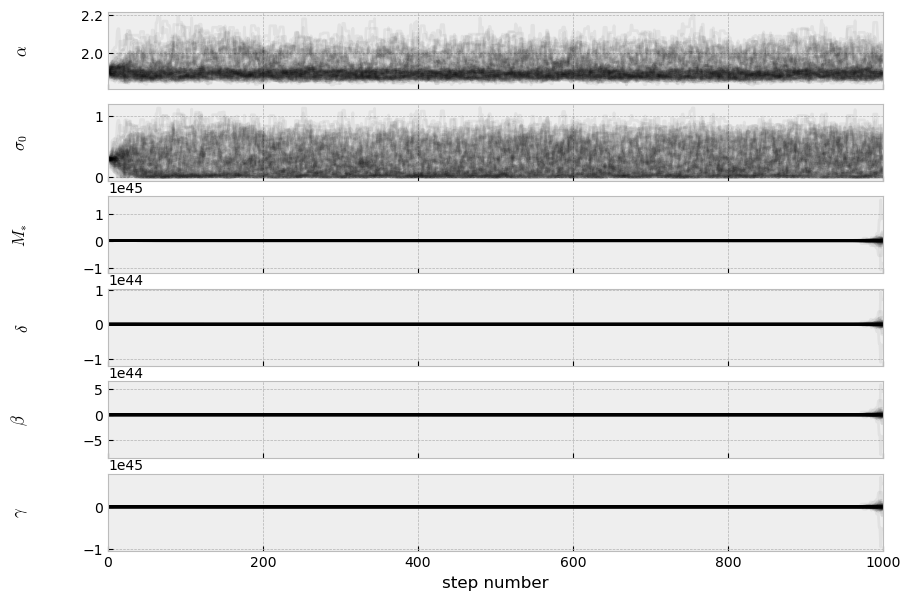

(15000, 6)


In [41]:
allwalk_6p = GRAB("../../../data/fixed_test_v2/6p_allwalk/chain.h5", Nstack)

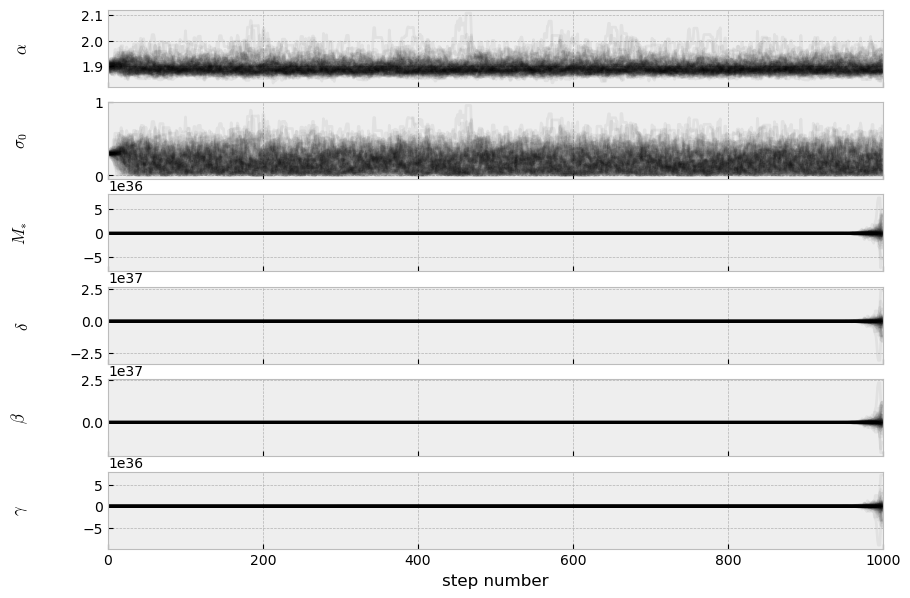

(15000, 6)


In [42]:
Ncorr_allwalk_6p = GRAB("../../../data/fixed_test_v2/6p_Ncorr_allwalk/chain.h5", Nstack)

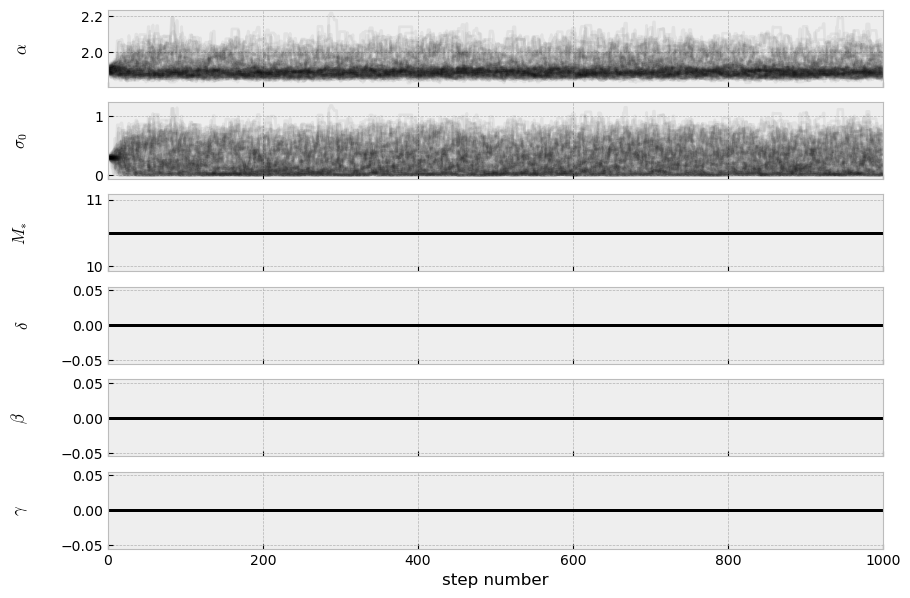

(15000, 6)


In [43]:
fixed_6p = GRAB("../../../data/fixed_test_v2/6p_fixed/chain.h5", Nstack)

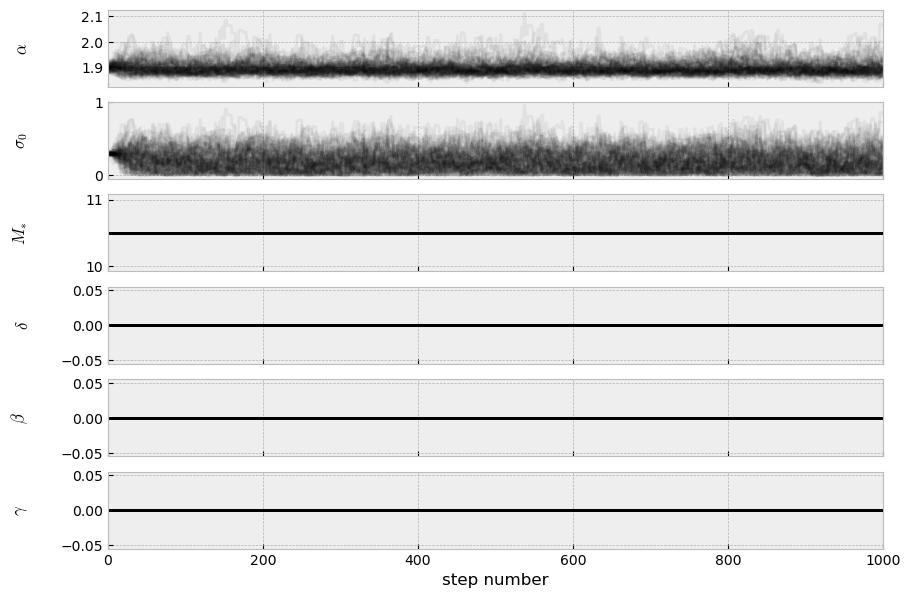

(15000, 6)


In [44]:
Ncorr_fixed_6p = GRAB("../../../data/fixed_test_v2/6p_Ncorr_fixed/chain.h5", Nstack)

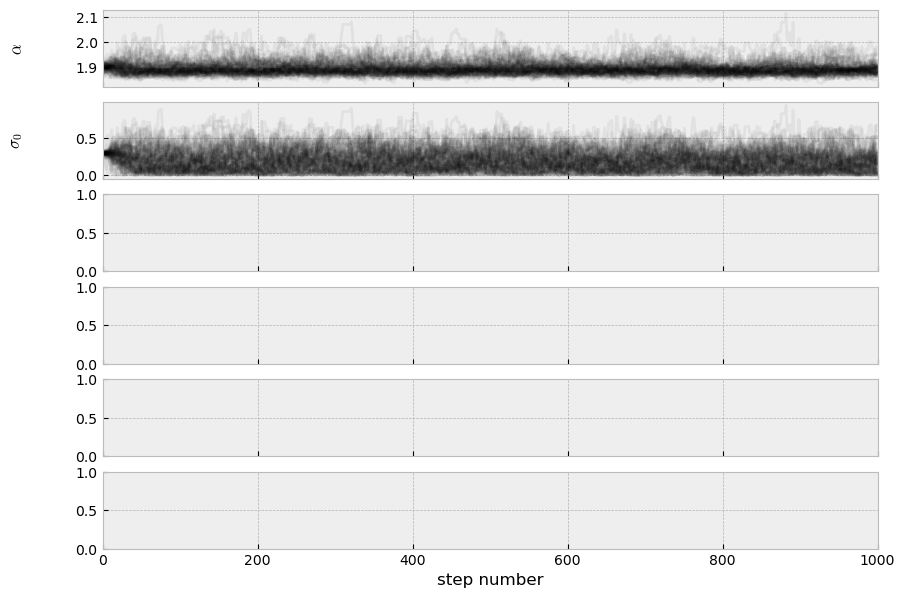

(15000, 2)


In [45]:
simple_2p = GRAB("../../../data/fixed_test_v2/2p/chain.h5", Nstack, cut=False, n=2)

In [46]:
names = np.array(["2p", "6p_fixed", "6p_Ncorr_fixed", "6p_allwalk", "6p_Ncorr_allwalk"])

chainz = np.array([simple_2p, fixed_6p, Ncorr_fixed_6p, allwalk_6p, Ncorr_allwalk_6p])

colorz = np.array(['blues', 'oranges', 'greens', 'reds', 'purples'])

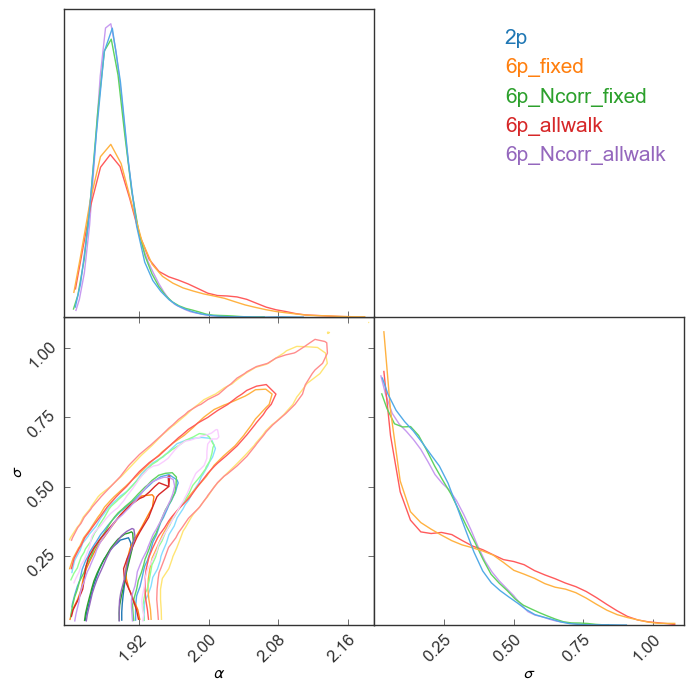

In [47]:
GTC = pygtc.plotGTC(chains=chainz, 
                    paramNames=["$\\alpha$", "$\\sigma$"],
                    chainLabels=names,
                    nContourLevels=3,
                    figureSize=8,
                    smoothingKernel=1,
                    filledPlots=False,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

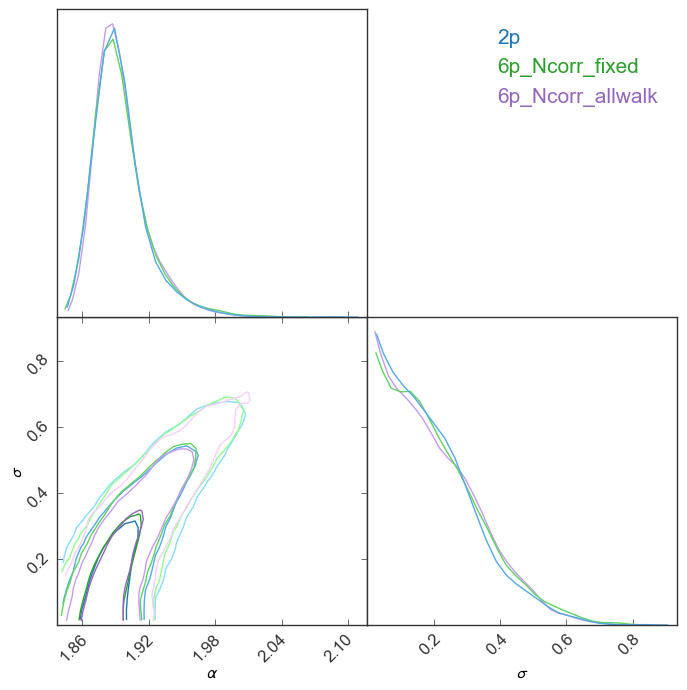

In [48]:
index = [0,2,4]


GTC = pygtc.plotGTC(chains=chainz[index], 
                    paramNames=["$\\alpha$", "$\\sigma$"],
                    chainLabels=names[index],
                    nContourLevels=3,
                    figureSize=8,
                    smoothingKernel=1,
                    filledPlots=False,
                    colorsOrder=colorz[index],
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})